In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/MyDrive/garbage_classification'

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # VGG16 uses 224x224 images
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 8731 images belonging to 8 classes.
Found 2180 images belonging to 8 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 27564360 (105.15 MB)
Trainable params: 12849672 (49.02 MB)
Non-trainable params: 14714688 (56.13 MB)
________

In [ ]:
# Setup training with checkpoints and early stopping
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/best_model_vgg16-samp.h5', save_best_only=True, monitor='val_accuracy', verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=7, verbose=1)
]

# Train the model with only 2 epochs
history = model.fit(
    train_generator,
    epochs=5,  # Reduced number of epochs
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

# Save the model in .h5 format (optional, since ModelCheckpoint already does this)
model.save('/content/drive/MyDrive/best_model_vgg16-samp.h5')

# Load the model (optional)
model = tf.keras.models.load_model('/content/drive/MyDrive/best_model_vgg16-samp.h5')

Epoch 1/5
273/273 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.7480 
Epoch 1: val_accuracy improved from -inf to 0.79587, saving model to /content/drive/MyDrive/best_model_vgg16-samp.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


273/273 [==============================] - 7246s 27s/step - loss: 0.8954 - accuracy: 0.7480 - val_loss: 0.5405 - val_accuracy: 0.7959
Epoch 2/5
273/273 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.8311 
Epoch 2: val_accuracy improved from 0.79587 to 0.81697, saving model to /content/drive/MyDrive/best_model_vgg16-samp.h5
273/273 [==============================] - 7231s 27s/step - loss: 0.4743 - accuracy: 0.8311 - val_loss: 0.5077 - val_accuracy: 0.8170
Epoch 3/5
273/273 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8771 
Epoch 3: val_accuracy improved from 0.81697 to 0.82523, saving model to /content/drive/MyDrive/best_model_vgg16-samp.h5
273/273 [==============================] - 7245s 27s/step - loss: 0.3521 - accuracy: 0.8771 - val_loss: 0.4653 - val_accuracy: 0.8252
Epoch 4/5
 97/273 [=========>....................] - ETA: 1:00:32 - loss: 0.3025 - accuracy: 0.8898

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/best_model_vgg16-samp.h5')

# Setup training with checkpoints and early stopping
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/best_model_vgg16-samp.h5', save_best_only=True, monitor='val_accuracy', verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=7, verbose=1)
]

history = model.fit(
    train_generator,
    epochs=5,
    initial_epoch=3,  # Restart from epoch 4
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

model.save('/content/drive/MyDrive/best_model_vgg16-samp.h5')


Epoch 4/5
273/273 [==============================] - ETA: 0s - loss: 0.3281 - accuracy: 0.8831 
Epoch 4: val_accuracy improved from -inf to 0.82798, saving model to /content/drive/MyDrive/best_model_vgg16-samp.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


273/273 [==============================] - 7031s 26s/step - loss: 0.3281 - accuracy: 0.8831 - val_loss: 0.4915 - val_accuracy: 0.8280
Epoch 5/5
273/273 [==============================] - ETA: 0s - loss: 0.2979 - accuracy: 0.8908 
Epoch 5: val_accuracy improved from 0.82798 to 0.83624, saving model to /content/drive/MyDrive/best_model_vgg16-samp.h5
273/273 [==============================] - 6942s 25s/step - loss: 0.2979 - accuracy: 0.8908 - val_loss: 0.4469 - val_accuracy: 0.8362


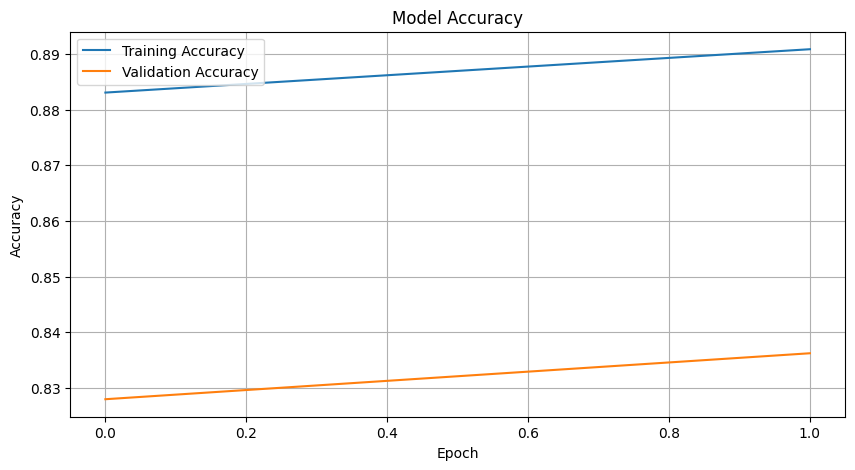

In [ ]:
# Plotting the accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


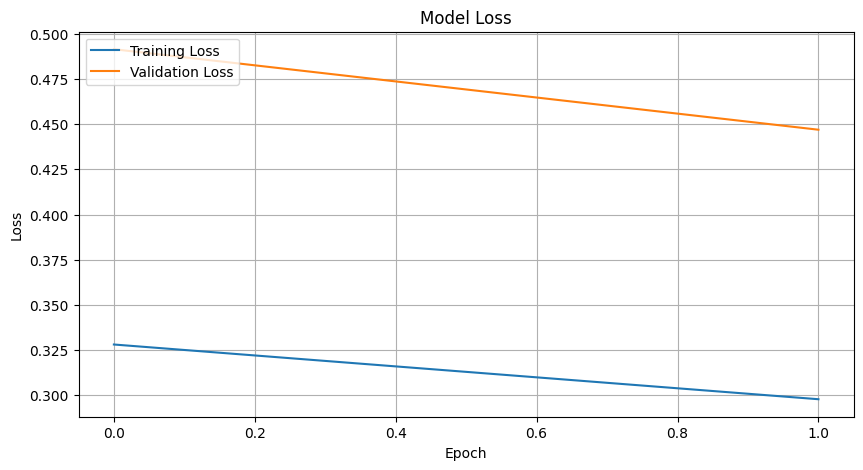

In [ ]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Labels for prediction
labels = ['brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'white-glass']


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

Saving blank-matt-brown-glass-bottle-600nw-2329678433.webp to blank-matt-brown-glass-bottle-600nw-2329678433.webp
1/1 [==============================] - 0s 472ms/step


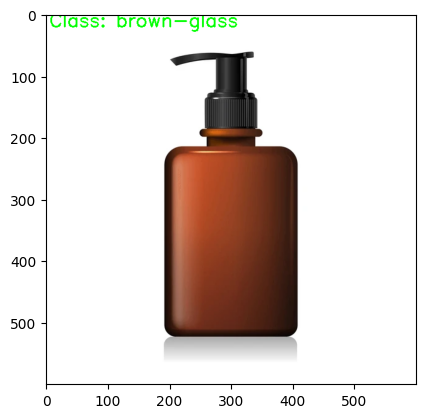

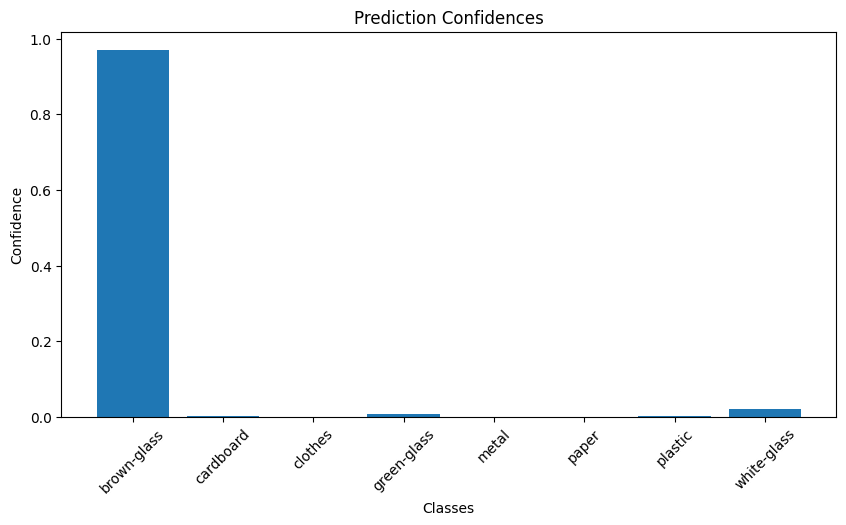

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files

# Define class labels
class_labels = ['brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'white-glass']

# Load the trained model
model = load_model('/content/drive/MyDrive/best_model_vgg16-samp.h5')

# Function to display prediction confidences
def display_prediction_confidences(predictions):
    plt.figure(figsize=(10, 5))
    plt.bar(class_labels, predictions[0])  # Update x-ticks to class labels
    plt.title('Prediction Confidences')
    plt.xlabel('Classes')
    plt.ylabel('Confidence')
    plt.xticks(rotation=45)  # Optional: Rotate labels for better visibility
    plt.show()

# Function to upload and predict an image
def upload_and_predict():
    uploaded = files.upload()
    for fn in uploaded.keys():
        path = '/content/' + fn
        img = image.load_img(path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        predictions = model.predict(img_array)
        max_confidence = np.max(predictions[0])
        predicted_class_index = np.argmax(predictions[0])
        predicted_class_name = class_labels[predicted_class_index]

        # Set threshold for prediction confidence
        if max_confidence > 0.6:  # Threshold can be adjusted based on your accuracy requirements
            prediction_text = f"Class: {predicted_class_name}"
        else:
            prediction_text = "Class: None"  # Classifies as 'None' if confidence is below the threshold

        img_cv = cv2.imread(path)
        cv2.putText(img_cv, prediction_text, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
        plt.show()

        display_prediction_confidences(predictions)

upload_and_predict()

<IPython.core.display.Javascript object>

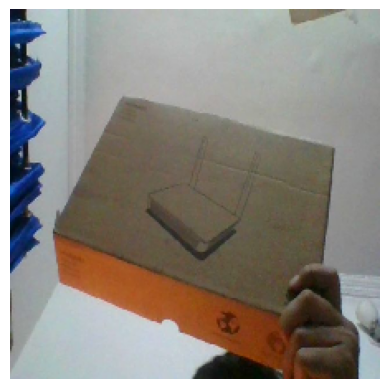

1/1 [==============================] - 0s 469ms/step
The uploaded image is classified as: cardboard


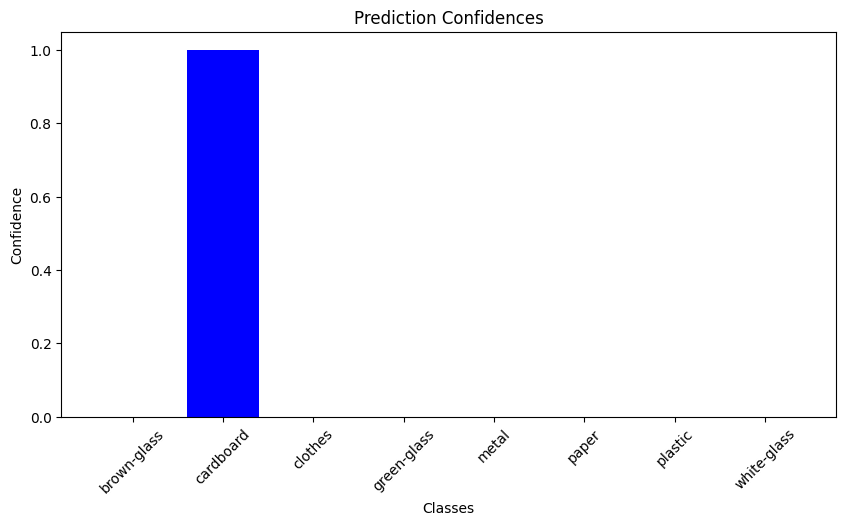

In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Function to capture an image from the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Function to display prediction confidences
def display_prediction_confidences(predictions):
    class_labels = ['brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'white-glass']
    confidences = predictions[0]
    plt.figure(figsize=(10, 5))
    plt.bar(class_labels, confidences, color='blue')
    plt.title('Prediction Confidences')
    plt.xlabel('Classes')
    plt.ylabel('Confidence')
    plt.xticks(rotation=45)
    plt.show()

# Load the trained model
model = load_model('/content/drive/MyDrive/best_model_vgg16-samp.h5')

# Capture an image from the webcam
image_path = take_photo()

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Display the captured image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict the class of the input image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = ['brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'white-glass'][predicted_class_index]
print(f"The uploaded image is classified as: {predicted_class_name}")

# Display the prediction confidences
display_prediction_confidences(predictions)